<a href="https://colab.research.google.com/github/sahil11082000/TSF_Internship_Tasks/blob/main/Prediction_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Spark Foundation**
---



#*Graduate Rotational Internship Program - July2021* 
##Data Science & Business Analytics Tasks

---
## Task 1: Prediction using Supervised ML
### *Our task Includes:*
### 1. To analyze the data and make predictions 
### 2. What will be predicted score if a student studies for 9.25 hrs/ day?
---



In [1]:
# Importing the required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Creating the dataframe using pandas read_csv() and displaying it first few rows.
df = pd.read_csv("/content/study_data.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


we are given a simple dataset where we have only one target variable(i.e. Score) and one independent variable(i.e. Hours). Here,

Hours indicates how much hours of study a student does.

Scores indicates the marks obtained by the student by doing xyz(any value from hours column) hours of study.

In [3]:
# Reviewing the infomation hold by the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
# Checking the various measures of dataframe.i.e.
# Measure of central tendency, Measure of dispersion
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


From the above table we can see that,

min hours of study done by student(s): 1.1

max hours of study done by student(s): 9.2

Average(mean) hours of study done by students: 5.012

min marks scored by the student(s): 17

max marks scored by the student(s): 95

Average marks scored by students: 51.48

In [17]:
# Checking for missing values:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

The 0 indicates that our data is cleaned and we are ready to visualize it and make models.

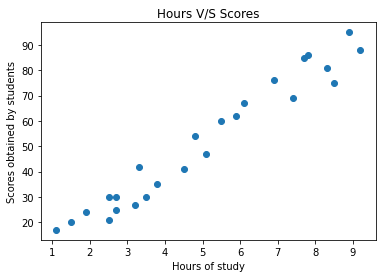

In [6]:
# Visualizing the data:
plt.scatter(data = df, x = 'Hours', y = 'Scores')
plt.title("Hours V/S Scores")
plt.xlabel("Hours of study")
plt.ylabel("Scores obtained by students")
plt.show()

we can see that, hours of study has a linear relationship with scores gained by students.
from here we decide that we use linear regression model for our data.

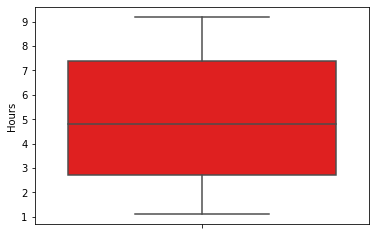

In [7]:
#Visualizing for distributions.
sns.boxplot(data = df, y = 'Hours',color='r')
plt.show()

This above boxplot is showing that we don't have outliers in our data. The Boxplot is also showing the Measure of Central tendency like min, max, 25%, 50%, 75%

In [8]:
# Model building phase:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [9]:
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

#dividing the data for training and test purpose:
x_train,x_test, y_train, y_test = train_test_split(x, y, 
                                                   test_size = 0.25, 
                                                   random_state = 0)


In [10]:
print("X train", len(x_train))
print("X test", len(x_test))
print("Y train", len(y_train))
print("Y test", len(y_test))

X train 18
X test 7
Y train 18
Y test 7


In [11]:
# model creation and training.
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# model prediction
predictions = model.predict(x_test)

In [13]:
pred_check = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
pred_check

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


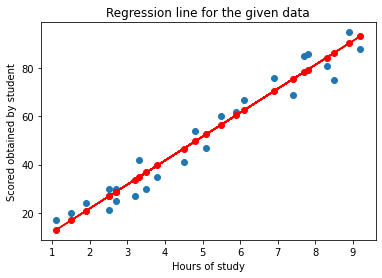

In [14]:
# Plotting the regression line
line = model.coef_*x + model.intercept_ # y = mx + c linear equation

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line,'ro-')
plt.title('Regression line for the given data')
plt.xlabel("Hours of study")
plt.ylabel("Scored obtained by student")
plt.show()

In [15]:
# What will be predicted score if a student studies for 9.25 hrs/ day?
hours = 9.25
_pred = model.predict([[hours]])
print("No of Hours studied by a student = {}".format(hours))
print("Predicted Score for {} hours of study = {}".format(hours,_pred[0]))

No of Hours studied by a student = 9.25
Predicted Score for 9.25 hours of study = 93.89272889341652


In [18]:
#finding the residual errors: Evaluation of model

print("mean absolute error: ",mean_absolute_error(y_test, predictions))


mean absolute error:  4.130879918502482


The above mean_absolute error shows that our prediction have +-4.13 unit of error for mean of test cases.






---
### Thank You!!!
